<a href="https://colab.research.google.com/github/nnmm7787/COVID-19/blob/master/COFID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID-19 Analysis, Visualization

Introduction to COVID-19
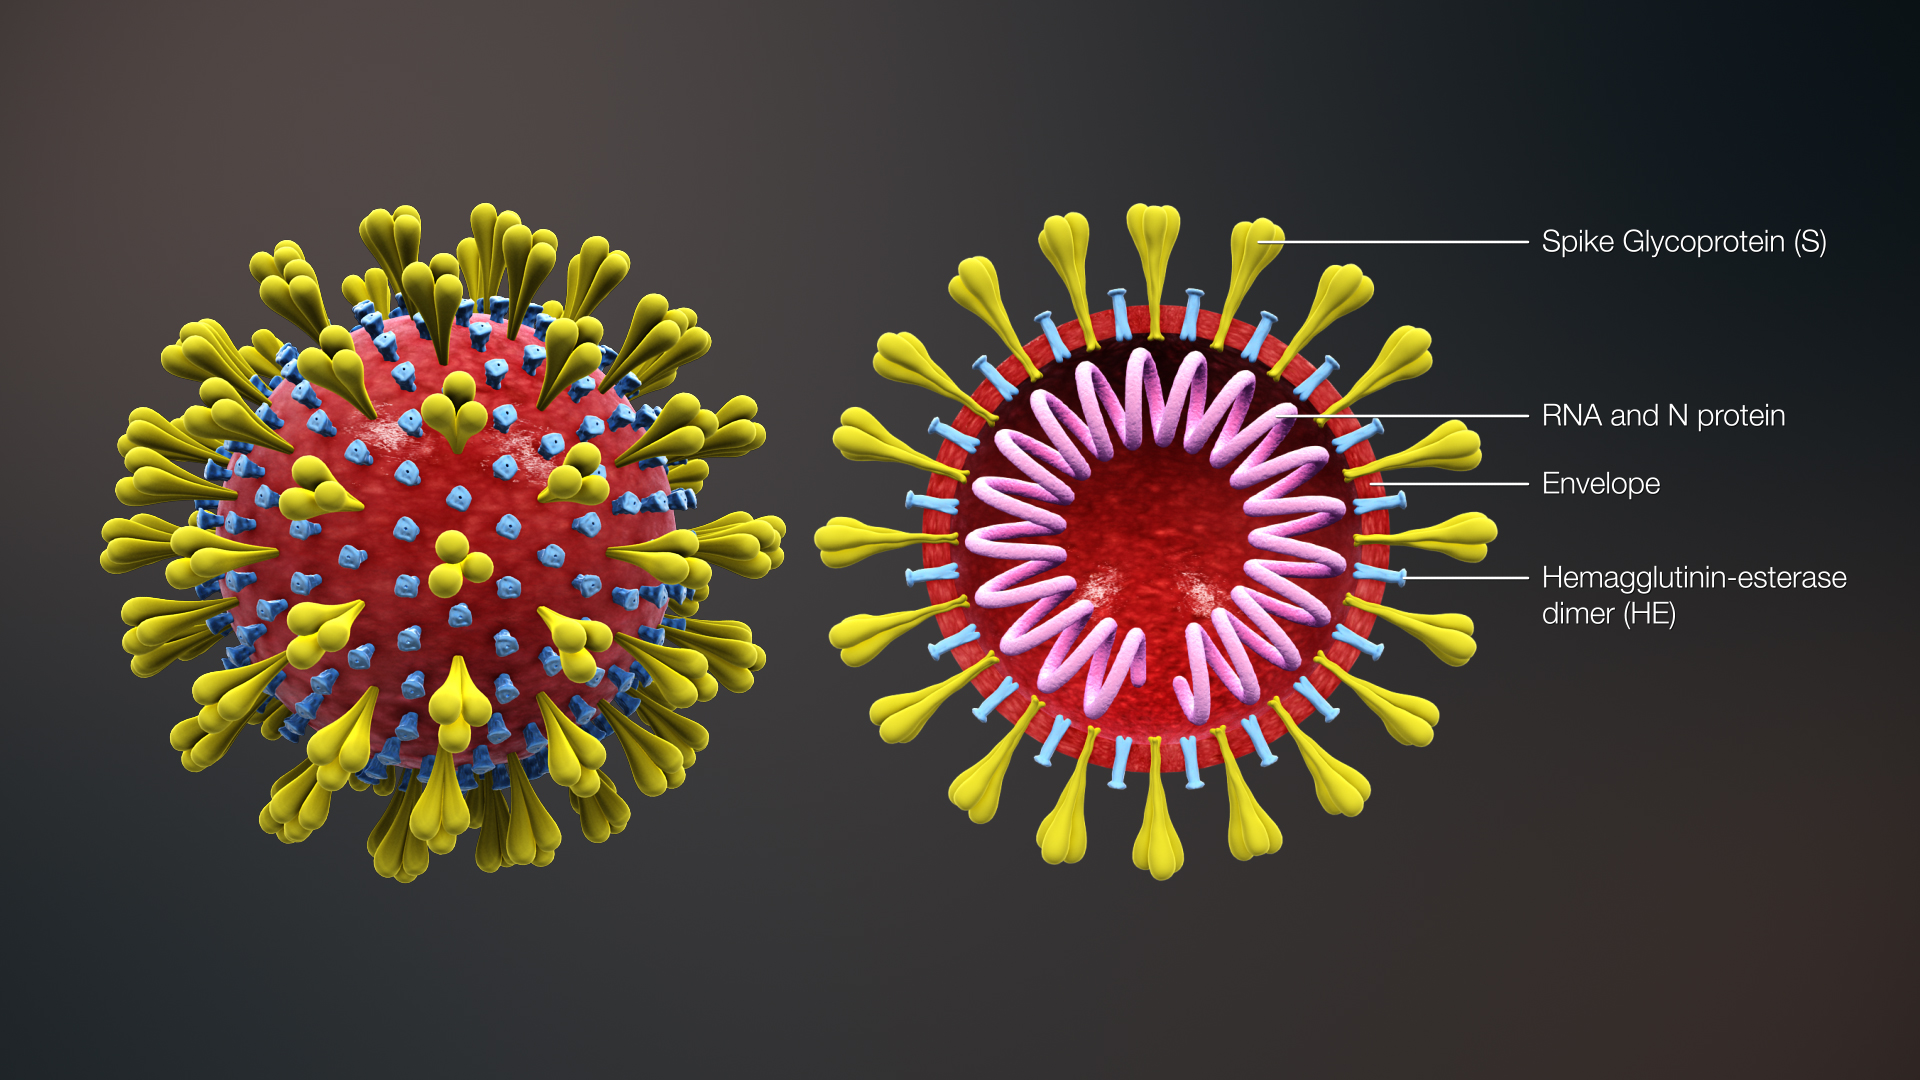

Coronavirus is a family of viruses that can cause illness, which can vary from colds and coughs to a more severe illness at times. Middle East respiratory syndrome (MERS-CoV) and severe acute respiratory syndrome (SARS-CoV) were two of the severe cases the world had already faced.
SARS-CoV-2 (n-virus) is the new virus of the coronavirus family, first discovered in 2019, and which has not been recognized in humans before. It is a contiguous virus that started in Wuhan in December 2019. It was later declared a pandemic by the World Health Organization due to its high rate of spread around the world. Currently (as of June 10, 2020), this results in a total of 500,000 deaths worldwide.
The epidemic is spreading all over the world. It becomes important to understand this spread. This notebook is an attempt to analyze the cumulative data of confirmed cases, deaths, and recoveries over time. In this notebook, the analysis focuses on the trend of the spread of this virus throughout the world and the Arab Gulf states.


---
فيروس كورونا هو عائلة من الفيروسات التي يمكن أن تسبب المرض ، والتي يمكن أن تختلف من نزلات البرد والسعال إلى مرض أكثر حدة في بعض الأحيان. كانت متلازمة الشرق الأوسط التنفسية (MERS-CoV) والمتلازمة التنفسية الحادة الوخيمة (SARS-CoV) من الحالات الشديدة التي واجهها العالم بالفعل.
SARS-CoV-2 (n-virus) هو الفيروس الجديد لعائلة الفيروس التاجي ، الذي اكتشف لأول مرة في عام 2019 ، والذي لم يتم التعرف عليه لدى البشر من قبل. إنه فيروس متجاور بدأ من ووهان في ديسمبر 2019. والذي أعلن لاحقًا أنه جائحة من قبل منظمة الصحة العالمية بسبب ارتفاع معدل انتشاره في جميع أنحاء العالم. حاليًا (في تاريخ 10 يونيو 2020) ، يؤدي هذا إلى ما مجموعه 500 ألف حالة وفاة في جميع أنحاء العالم.
الوباء ينتشر في جميع أنحاء العالم. يصبح من المهم فهم هذا الانتشار. يُعد دفتر الملاحظات هذا محاولة لتحليل البيانات التراكمية للحالات المؤكدة والوفيات والحالات المستعادة بمرور الوقت. في هذا الكمبيوتر الدفتري ، يركزالتحليل على اتجاه انتشار هذا الفيروس في جميع أنحاء العالم ودول الخليج العربي .



# **Imports and Datasets**

In [4]:
#اضافة المكتبات المطلوبة 
#import the libraries

from plotly import subplots
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import folium

import plotly as py
py.offline.init_notebook_mode(connected=True)


import math
import random
from datetime import timedelta
import warnings
warnings.filterwarnings('ignore')

In [5]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [6]:
#قراءة البيانات 
#read_data
df = pd.read_csv('/content/COVID-19-geographic-disbtribution-worldwide-2020-12-07.csv')
df.head(5)

dateRep  ...  Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0  12/7/2020  ...                                           7.215755         
1  12/6/2020  ...                                           7.326160         
2  12/5/2020  ...                                           7.115865         
3  12/4/2020  ...                                           7.107979         
4  12/3/2020  ...                                           7.536455         

[5 rows x 12 columns]

In [7]:
# ازالة الاعمدة المكررة والغير هامة 
#Remove duplicate and unimportant columns
df.drop(['geoId'],axis=1,inplace=True)


In [8]:
#التاكد من عدم وجود قيم فارغة 
#Ensure that there are no null values
df.isnull().sum()

dateRep                                                          0
day                                                              0
month                                                            0
year                                                             0
cases                                                            0
deaths                                                           0
countriesAndTerritories                                          0
countryterritoryCode                                           116
popData2019                                                    116
continentExp                                                     0
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    2872
dtype: int64

In [9]:
# تعبئة القيم الفارغة بالرقم 0 
#Fill in blank values with the number 0

df['countryterritoryCode']=df['countryterritoryCode'].fillna(0)
df['popData2019']=df['popData2019'].fillna(0)
df['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000']=df['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'].fillna(0)
df.isnull().sum()


dateRep                                                       0
day                                                           0
month                                                         0
year                                                          0
cases                                                         0
deaths                                                        0
countriesAndTerritories                                       0
countryterritoryCode                                          0
popData2019                                                   0
continentExp                                                  0
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    0
dtype: int64

In [10]:
#Convert popDate2019 to small value
# تحويل قيم (popData2019) الى قيم صغيرة حتى يسهل التعامل معها 

df['popData2019'] = (df['popData2019']/float(1000000)).round(2)


In [11]:
#تغيير مسمى بعض الاعمدة 
#Change the name of some columns
df.rename({'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000':'Cumulative number 14 days cases/100000', 
               'countriesAndTerritories':'Countries','dateRep':'Date'},
              axis=1, inplace=True)


In [12]:
#تغيير صيغة عرض التاريخ 
df['Date']=pd.to_datetime(df['Date'],format='%m/%d/%Y')


In [13]:
df.head()

Date  day  ...  continentExp  Cumulative number 14 days cases/100000
0 2020-12-07    7  ...          Asia                                7.215755
1 2020-12-06    6  ...          Asia                                7.326160
2 2020-12-05    5  ...          Asia                                7.115865
3 2020-12-04    4  ...          Asia                                7.107979
4 2020-12-03    3  ...          Asia                                7.536455

[5 rows x 11 columns]

In [14]:
df.tail()

Date  day  ...  continentExp  Cumulative number 14 days cases/100000
60404 2020-03-25   25  ...        Africa                                     0.0
60405 2020-03-24   24  ...        Africa                                     0.0
60406 2020-03-23   23  ...        Africa                                     0.0
60407 2020-03-22   22  ...        Africa                                     0.0
60408 2020-03-21   21  ...        Africa                                     0.0

[5 rows x 11 columns]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60409 entries, 0 to 60408
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Date                                    60409 non-null  datetime64[ns]
 1   day                                     60409 non-null  int64         
 2   month                                   60409 non-null  int64         
 3   year                                    60409 non-null  int64         
 4   cases                                   60409 non-null  int64         
 5   deaths                                  60409 non-null  int64         
 6   Countries                               60409 non-null  object        
 7   countryterritoryCode                    60409 non-null  object        
 8   popData2019                             60409 non-null  float64       
 9   continentExp                            60409 non-

In [16]:

df.describe()

day  ...  Cumulative number 14 days cases/100000
count  60409.000000  ...                            60409.000000
mean      15.743300  ...                               60.170113
std        8.914101  ...                              153.224059
min        1.000000  ...                             -147.419587
25%        8.000000  ...                                0.386662
50%       16.000000  ...                                5.546601
75%       23.000000  ...                               44.743244
max       31.000000  ...                             1900.836210

[8 rows x 7 columns]

In [17]:
#total Confirmed,Deaths for each day

cases= df.groupby("Date").sum()['cases'].reset_index()
cases.tail(15)

Date   cases
328 2020-11-23  520929
329 2020-11-24  532074
330 2020-11-25  559911
331 2020-11-26  649314
332 2020-11-27  550790
333 2020-11-28  626127
334 2020-11-29  558318
335 2020-11-30  510808
336 2020-12-01  476571
337 2020-12-02  564403
338 2020-12-03  634559
339 2020-12-04  654042
340 2020-12-05  656912
341 2020-12-06  589560
342 2020-12-07  503362

In [18]:
deaths= df.groupby("Date").sum()['deaths'].reset_index()
deaths.head(10)

Date  deaths
0 2019-12-31       0
1 2020-01-01       0
2 2020-01-02       0
3 2020-01-03       0
4 2020-01-04       0
5 2020-01-05       0
6 2020-01-06       0
7 2020-01-07       0
8 2020-01-08       0
9 2020-01-09       0

# **Interactive graphs**


---



# الحالات والوفيات على مرور الوقت ، وبتاريخ كم كانت اعلى عدد حالات عالميا ؟


---
# **Cases and deaths over time, and on what date was the highest number of cases in the world?**


In [19]:
configure_plotly_browser_state()

fig = go.Figure()
fig.add_trace(go.Scatter(x=cases['Date'],y=cases['cases']
                         ,mode='lines+markers',name='cases', line= dict(color="grey",width=2))
)

fig.add_trace(go.Scatter(x=deaths['Date'],y=deaths['deaths']
                         ,mode='lines+markers',name='deaths', line= dict(color="tomato",width=2))
)


fig.update_layout(title='worldwide cofid19 cases and deaths',xaxis_tickfont_size=14,
                  yaxis=dict(title='Number of cases and deaths'))

fig.show()

**اعلى عدد حالات كانت بتاريخ ٢١ نوفمبر : ٦٨١ الف حالة واعلى عدد وفيات كانت بتاريخ ١٦ ابريل :١٠ الاف حالة وفاة**



---

---
**The highest number of cases was on November 21: 681 thousand, and the highest number of deaths was on April 16: 10,000 deaths**




In [20]:
#Cases and deaths over time

configure_plotly_browser_state()

temp=df.groupby('Date')['cases','deaths'].sum().reset_index()
temp=temp.melt(id_vars='Date',value_vars=['cases','deaths'],var_name='Case',value_name='count')
f=px.area(temp,x= 'Date',y='count',color='Case',height= 400,title= 'Cases over time',color_discrete_sequence=['green','red'])
f.update_layout(xaxis_rangeslider_visible=True)
f.show()

# من هي أعلى 10  دُول في عدد الوفيات والاصابات منذ بداية تفشي الفيروس؟


---

---
# Who are the top 10 countries in the number of deaths and infections since the beginning of the virus?




In [21]:

cases_= df.groupby('Countries').sum()['cases'].reset_index()

deaths_= df.groupby('Countries').sum()['deaths'].reset_index()


In [22]:
configure_plotly_browser_state()

top=10
fig_a=px.bar(cases_.sort_values('cases').tail(top),x='cases',y='Countries',orientation='h',text='cases',color_discrete_sequence=['teal'])
fig_b=px.bar(deaths_.sort_values('deaths').tail(top),x='deaths',y='Countries',orientation='h',text='deaths',color_discrete_sequence=['steelblue'])

fig=make_subplots(rows=1,cols=2,shared_xaxes=False,horizontal_spacing=0.3,vertical_spacing=.05,
                 subplot_titles=('total Cases','total deaths'))
fig.add_trace(fig_a['data'][0],row=1,col=1)
fig.add_trace(fig_b['data'][0],row=1,col=2)
fig.update_layout(height=700)

fig.show()

**اظهر التحليل بان امريكا ومن ثم البرازيل ومن ثم الهند هي اعلى عدد الحالات منذ بداية الفيروس ، و عدد الوفيات فقد كانت امريكا ايضا ومن ثم الهند **

**The analysis showed that America, then Brazil, and then India are the highest number of cases since the beginning of the virus, and the number of deaths was also America, then India**

# في التحليل القادم سوف نعرض  متوسط الحالات والوفيات لاعلى الدول

---

---

#In the next analysis, we will show the average cases and deaths for the highest countries



In [23]:
configure_plotly_browser_state()

from datetime import date
d1 = date(2020,12,7)
d2 = date(2020,3,25)
corona_days = (d1-d2).days


cases_['AVG_cases']=cases_['cases'] / corona_days
top=15
fig = px.bar(cases_.sort_values('cases').tail(10), x='Countries', y='AVG_cases',
             hover_data=['AVG_cases'],
             labels={'AVG_cases':'AVG_cases'}, height=700,text='AVG_cases')
fig.update_traces(marker_color='skyblue', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(title_text='Avrage cases for top Country',height=700,width=1000)
fig.show()

In [24]:
configure_plotly_browser_state()




deaths_['AVG_deaths']=deaths_['deaths'] / corona_days

fig = px.bar(deaths_.sort_values('deaths').tail(10), x='Countries', y='AVG_deaths',
             hover_data=['AVG_deaths'],
             labels={'AVG_deaths':'AVG_deaths'}, height=700,text='AVG_deaths')
fig.update_traces(marker_color='darkred', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(title_text='Avrage deaths for top Country',height=700,width=1000)
fig.show()



---



---
# مخططات وجداول دول الخليج العربي الحالات والوفيات 

---
#charts and tables for the Arabian gulf countries
#cases and deaths



---

---









In [25]:
Saudi_Arabia=df.query('Countries == "Saudi_Arabia" ')
Saudi_Arabia

Date  day  ...  continentExp  Cumulative number 14 days cases/100000
47786 2020-12-07    7  ...          Asia                               10.082137
47787 2020-12-06    6  ...          Asia                               10.190108
47788 2020-12-05    5  ...          Asia                               10.280570
47789 2020-12-04    4  ...          Asia                               10.432312
47790 2020-12-03    3  ...          Asia                               10.692026
...          ...  ...  ...           ...                                     ...
48058 2020-03-10   10  ...          Asia                                0.000000
48059 2020-03-09    9  ...          Asia                                0.000000
48060 2020-03-08    8  ...          Asia                                0.000000
48061 2020-03-06    6  ...          Asia                                0.000000
48062 2020-03-03    3  ...          Asia                                0.000000

[277 rows x 11 columns]

In [26]:
configure_plotly_browser_state()
fig = go.Figure([
    go.Scatter(

        name='cases',
        x=Saudi_Arabia['Date'],
        y=Saudi_Arabia['cases'],
        mode='lines',
        marker=dict(color='red', size=2),
        showlegend=True
    ),
    go.Scatter(
        name='deaths',
        x=Saudi_Arabia['Date'],
        y=Saudi_Arabia['deaths'],
        mode='lines',
        marker=dict(color="#444"),
        line=dict(width=1),
        showlegend=True
    )
])
fig.update_layout(
    yaxis_title='Total of Deaths & Cases',
    xaxis_title='Over Time',
    title='deaths & cases over the time for Saudi_Arabia',
    hovermode="x",
    height=400,width=500,
)
fig.show()

**في المملكة العربية السعودية وصلت اعلى عدد حالات الى 4919 في تاريخ 18 جون واعلى عدد وفيات 58 في 6 جولي **

**In the Kingdom of Saudi Arabia, the highest number of cases reached 4,919 in the date of June 18, and the highest number of deaths was 58 in July**

In [27]:
Qatar=df.query('Countries == "Qatar" ')
Qatar

Date  day  ...  continentExp  Cumulative number 14 days cases/100000
45126 2020-12-07    7  ...          Asia                               94.595086
45127 2020-12-06    6  ...          Asia                               96.078100
45128 2020-12-05    5  ...          Asia                               97.278635
45129 2020-12-04    4  ...          Asia                               99.856254
45130 2020-12-03    3  ...          Asia                               99.397226
...          ...  ...  ...           ...                                     ...
45460 2020-01-04    4  ...          Asia                                0.000000
45461 2020-01-03    3  ...          Asia                                0.000000
45462 2020-01-02    2  ...          Asia                                0.000000
45463 2020-01-01    1  ...          Asia                                0.000000
45464 2019-12-31   31  ...          Asia                                0.000000

[339 rows x 11 columns]

In [28]:
configure_plotly_browser_state()

fig = go.Figure([
    go.Scatter(

        name='cases',
        x=Qatar['Date'],
        y=Qatar['cases'],
        mode='lines',
        marker=dict(color='red', size=2),
        showlegend=True
    ),
    go.Scatter(
        name='deaths',
        x=Qatar['Date'],
        y=Qatar['deaths'],
        mode='lines',
        marker=dict(color="#444"),
        line=dict(width=1),
        showlegend=True
    )
])
fig.update_layout(
    yaxis_title='Total of Deaths & Cases',
    xaxis_title='Over Time',
    title='deaths & cases over the time for Qatar',
    hovermode="x",
    height=400,width=500,
)
fig.show()

**في قطر وصلت اعلى عدد حالات الى 2355  في تاريخ 31  مايو واعلى عدد وفيات 5  في ٦ جولي**


**In Qatar, the highest number of cases reached 2,355 on May 31, and the highest number of deaths was 5 in 6 July**

In [29]:
United_Arab_Emirates=df.query('Countries == "United_Arab_Emirates" ')
United_Arab_Emirates

Date  day  ...  continentExp  Cumulative number 14 days cases/100000
56648 2020-12-07    7  ...          Asia                              178.485785
56649 2020-12-06    6  ...          Asia                              179.017998
56650 2020-12-05    5  ...          Asia                              179.509271
56651 2020-12-04    4  ...          Asia                              179.079407
56652 2020-12-03    3  ...          Asia                              177.400889
...          ...  ...  ...           ...                                     ...
56980 2020-01-04    4  ...          Asia                                0.000000
56981 2020-01-03    3  ...          Asia                                0.000000
56982 2020-01-02    2  ...          Asia                                0.000000
56983 2020-01-01    1  ...          Asia                                0.000000
56984 2019-12-31   31  ...          Asia                                0.000000

[337 rows x 11 columns]

In [30]:
configure_plotly_browser_state()
fig = go.Figure([
    go.Scatter(

        name='cases',
        x=United_Arab_Emirates['Date'],
        y=United_Arab_Emirates['cases'],
        mode='lines',
        marker=dict(color='red', size=2),
        showlegend=True
    ),
    go.Scatter(
        name='deaths',
        x=United_Arab_Emirates['Date'],
        y=United_Arab_Emirates['deaths'],
        mode='lines',
        marker=dict(color="#444"),
        line=dict(width=1),
        showlegend=True
    )
])
fig.update_layout(
    yaxis_title='Total of Deaths & Cases',
    xaxis_title='Over Time',
    title='deaths & cases over the time for Saudi_Arabia',
    hovermode="x",
    height=400,width=500,
)
fig.show()

**في الامارات العربية المتحدة وصلت اعلى عدد حالات الى 1578   في تاريخ 23 اكتوبر واعلى عدد وفيات13  في11  مايو**

**In the United Arab Emirates, the highest number of cases reached 1578 on October 23, and the highest number of deaths was 13 on May 11**

In [31]:
Kuwait=df.query('Countries == "Kuwait" ')
Kuwait

Date  day  ...  continentExp  Cumulative number 14 days cases/100000
30708 2020-12-07    7  ...          Asia                              102.517734
30709 2020-12-06    6  ...          Asia                              105.298762
30710 2020-12-05    5  ...          Asia                              109.553498
30711 2020-12-04    4  ...          Asia                              112.952532
30712 2020-12-03    3  ...          Asia                              117.017112
...          ...  ...  ...           ...                                     ...
31043 2020-01-04    4  ...          Asia                                0.000000
31044 2020-01-03    3  ...          Asia                                0.000000
31045 2020-01-02    2  ...          Asia                                0.000000
31046 2020-01-01    1  ...          Asia                                0.000000
31047 2019-12-31   31  ...          Asia                                0.000000

[340 rows x 11 columns]

In [32]:
configure_plotly_browser_state()
fig = go.Figure([
    go.Scatter(

        name='cases',
        x=Kuwait['Date'],
        y=Kuwait['cases'],
        mode='lines',
        marker=dict(color='red', size=2),
        showlegend=True
    ),
    go.Scatter(
        name='deaths',
        x=Kuwait['Date'],
        y=Kuwait['deaths'],
        mode='lines',
        marker=dict(color="#444"),
        line=dict(width=1),
        showlegend=True
    )
])
fig.update_layout(
    yaxis_title='Total of Deaths & Cases',
    xaxis_title='Over Time',
    title='deaths & cases over the time for Kuwait',
    hovermode="x",
    height=400,width=500,
)
fig.show()

**في الكويت وصلت اعلى عدد حالات الى1073    في تاريخ 20  مايو واعلى عدد وفيات 11 في 31 مايو**

**In Kuwait, the highest number of cases reached 1073 on May 20 and the highest number of 11 deaths on May 31**

In [33]:
Oman=df.query('Countries == "Oman" ')
Oman

Date  day  ...  continentExp  Cumulative number 14 days cases/100000
41945 2020-12-07    7  ...          Asia                               56.382000
41946 2020-12-06    6  ...          Asia                               59.678488
41947 2020-12-05    5  ...          Asia                               59.678488
41948 2020-12-04    4  ...          Asia                               59.678488
41949 2020-12-03    3  ...          Asia                               60.623213
...          ...  ...  ...           ...                                     ...
42277 2020-01-04    4  ...          Asia                                0.000000
42278 2020-01-03    3  ...          Asia                                0.000000
42279 2020-01-02    2  ...          Asia                                0.000000
42280 2020-01-01    1  ...          Asia                                0.000000
42281 2019-12-31   31  ...          Asia                                0.000000

[337 rows x 11 columns]

In [34]:
configure_plotly_browser_state()
fig = go.Figure([
    go.Scatter(

        name='cases',
        x=Oman['Date'],
        y=Oman['cases'],
        mode='lines',
        marker=dict(color='red', size=2),
        showlegend=True
    ),
    go.Scatter(
        name='deaths',
        x=Oman['Date'],
        y=Oman['deaths'],
        mode='lines',
        marker=dict(color="#444"),
        line=dict(width=1),
        showlegend=True
    )
])
fig.update_layout(
    yaxis_title='Total of Deaths & Cases',
    xaxis_title='Over Time',
    title='deaths & cases over the time for Oman',
    hovermode="x",
    height=400,width=500,
)
fig.show()

**في عمان وصلت اعلى عدد حالات الى 2685 في تاريخ 5 اكتوبر واعلى عدد وفيات 42 في 5 اكتوبر**

**In oman, the highest number of cases reached 2,685 on October 5, and the highest number of deaths was 42 on October 5**

In [35]:
Bahrain=df.query('Countries == "Bahrain" ')
Bahrain

Date  day  ...  continentExp  Cumulative number 14 days cases/100000
4151 2020-12-07    7  ...          Asia                              135.574507
4152 2020-12-06    6  ...          Asia                              130.456188
4153 2020-12-05    5  ...          Asia                              129.968729
4154 2020-12-04    4  ...          Asia                              128.871947
4155 2020-12-03    3  ...          Asia                              127.226773
...         ...  ...  ...           ...                                     ...
4488 2020-01-04    4  ...          Asia                                0.000000
4489 2020-01-03    3  ...          Asia                                0.000000
4490 2020-01-02    2  ...          Asia                                0.000000
4491 2020-01-01    1  ...          Asia                                0.000000
4492 2019-12-31   31  ...          Asia                                0.000000

[342 rows x 11 columns]

In [36]:
configure_plotly_browser_state()
fig = go.Figure([
    go.Scatter(

        name='cases',
        x=Bahrain['Date'],
        y=Bahrain['cases'],
        mode='lines',
        marker=dict(color='red', size=2),
        showlegend=True
    ),
    go.Scatter(
        name='deaths',
        x=Bahrain['Date'],
        y=Bahrain['deaths'],
        mode='lines',
        marker=dict(color="#444"),
        line=dict(width=1),
        showlegend=True
    )
])
fig.update_layout(
    yaxis_title='Total of Deaths & Cases',
    xaxis_title='Over Time',
    title='deaths & cases over the time for Saudi_Arabia',
    hovermode="x",
    height=400,width=500,
)
fig.show()

**في البحرين وصلت اعلى عدد حالات الى 1305 في تاريخ8 سبتمبر واعلى عدد وفيات 7 في 10  اكتوبر**

In Bahrain, the highest number of cases reached 1,305 on the date of September 8 and the highest number of deaths 7 on October 10
****

In [37]:
# 
list_countries = ['Saudi_Arabia', 'United_Arab_Emirates', 'Kuwait', 'Qatar', 'Oman','Bahrain']
df1= df[df['Countries'].isin(list_countries)]
df1

Date  day  ...  continentExp  Cumulative number 14 days cases/100000
4151  2020-12-07    7  ...          Asia                              135.574507
4152  2020-12-06    6  ...          Asia                              130.456188
4153  2020-12-05    5  ...          Asia                              129.968729
4154  2020-12-04    4  ...          Asia                              128.871947
4155  2020-12-03    3  ...          Asia                              127.226773
...          ...  ...  ...           ...                                     ...
56980 2020-01-04    4  ...          Asia                                0.000000
56981 2020-01-03    3  ...          Asia                                0.000000
56982 2020-01-02    2  ...          Asia                                0.000000
56983 2020-01-01    1  ...          Asia                                0.000000
56984 2019-12-31   31  ...          Asia                                0.000000

[1972 rows x 11 columns]

In [38]:
configure_plotly_browser_state()

fig=px.line(df1, x='Date', y='cases' ,color='Countries' , title='The number of cases for the Arab Gulf states over time'
             ,height=600)

fig.show()

In [39]:
configure_plotly_browser_state()

fig=px.line(df1, x='Date', y='deaths' ,color='Countries' , title='The number of deaths for the Arab Gulf states over time'
             ,height=600)

fig.show()

In [40]:
#In the future, I'll be working on the ANOVA function, I haven't completed it ..

import statsmodels.api as sm
from statsmodels.formula.api import ols

mod=ols('cases~Countries',data=df1).fit()
aov=sm.stats.anova_lm(mod,type=2)
print(aov)


               df        sum_sq       mean_sq           F         PR(>F)
Countries     5.0  2.045074e+08  4.090147e+07  115.960979  1.177480e-107
Residual   1966.0  6.934427e+08  3.527175e+05         NaN            NaN


# I hope you like that
I am very pleased with your comments